# Анализ данных о диабете

## Задание 4. Загрузка и исследование данных

### head()

Таблица состоит из 9 столбцов: 
[id пациента]
[Беременность] - количество беременностей 
[Глюкоза] - уровень глюкозы в крови 
[Артериальное давление] - диастолическое артериальное давление
[Толщина кожи] - толщина кожной складки
[Инсулин] - уровень инсулина в сыворотке
[ИМТ] - индекс массы тела
[Диабет Родословная Функция] - генетическая предрасположенность к диабету
[Возраст] - возраст 
[Исход] - целевая переменная (0 — нет диабета или 1 — есть диабет)

In [3]:
import pandas as pd


clinical_data = pd.read_csv("diabetes.csv")

print(clinical_data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### info()

Всего в таблице 768 пациенток, все данные имеют тип int или float. Нет нулевых строк

In [5]:
clinical_data = pd.read_csv("diabetes.csv")
df = pd.DataFrame(clinical_data)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


### describe()

In [7]:
clinical_data = pd.read_csv("diabetes.csv")
df = pd.DataFrame(clinical_data)

print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

На данном этапе замечены аномалии в столбцах Glucose, BloodPressure, SkinThickness, Insulin, BMI. Минимальные значения не могут равняться 0. Для дальнейшего анализа стоит исключить их из датасета. 

### Исключения нулевых строк в столбцах Glucose, BloodPressure, SkinThickness, Insulin, BMI
Использую метод  Not a number из библиотеки numpy

In [19]:
import numpy as np


not_a_number = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[not_a_number] = df[not_a_number].replace(0, np.nan)

In [21]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  757.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.924988                  0.331329   11.760232    0.476951  
min     18.200000                  

## Задание 5. Корреляционный анализ

### Seaborn (heatmap)

<Axes: >

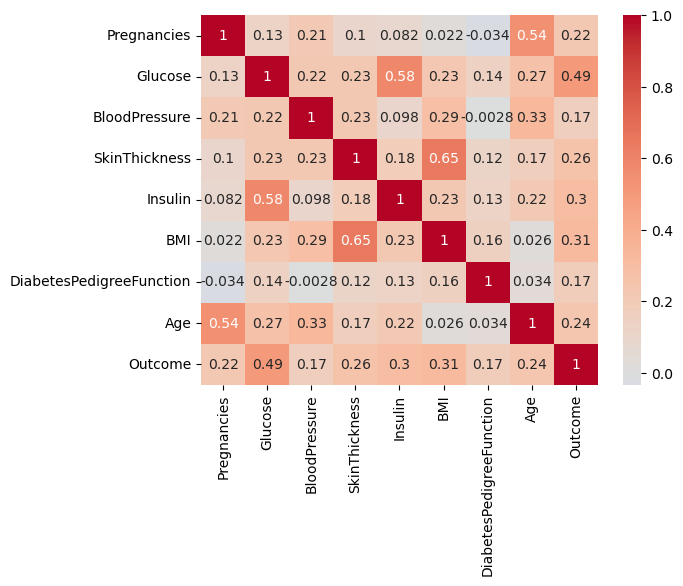

In [47]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tips_df = sns.load_dataset('tips')
tips_df.head()

# plt.figure(figsize=(9, 9))
sns.heatmap(df.corr(), annot = True, center= 0, cmap= 'coolwarm')

#### Интерпретация:

Для того, чтобы выявить корреляцию нам необходимо найти якро выраженные значения (на данной карте - красные)
Числовые значения корреляции

**BMI - SkinThickness 0.65**
Индекс массы тела не верно говорит о том, что человек имеет лишний вес. Однако, если брать еще показатель толщины кожной складки, то выходит, что люди с повышенным ИМТ имеют повышенную жировую клетчатку. 

**Insuline - Glucose 0.58**
• Ожидаемая положительная корреляция: Обычно можно ожидать положительную корреляцию между уровнем глюкозы и инсулина. Это означает, что, как правило, чем выше уровень глюкозы в крови, тем больше инсулина вырабатывается организмом (в попытке нормализовать уровень глюкозы).
На тепловой карте между инсулином и глюкозой видна положительная корреляция (красная ячейка), это может говорить о том, что, как правило, чем выше уровень глюкозы, тем выше уровень инсулина, что в основном ожидаемо. Однако, это может также указывать на инсулинорезистентность.

**Pregnancies - Age 0.54**
Чем старше женщина, тем больше беременностей у нее было. 

**Outcome - Glucose 0.49**
 В целом, этот результат соответствует ожиданиям. Повышенный уровень глюкозы является одним из основных признаков диабета. Коэффициент 0.49 - это хорошее подтверждение того, что выборка данных и признаки соответствуют реальным фактам.


In [51]:
corr_matrix = df.corr()

outcome_corr = corr_matrix["Outcome"].sort_values(ascending=False)
print("Корреляции с Outcome:\n", outcome_corr) 

Корреляции с Outcome:
 Outcome                     1.000000
Glucose                     0.494650
BMI                         0.313680
Insulin                     0.303454
SkinThickness               0.259491
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
BloodPressure               0.170589
Name: Outcome, dtype: float64


### Парные графики Pairs plot

Взяла для рассмотрения несколько параметров, с положительной корреляцией, чтобы визуально сравнить их с целевым значением наличия диабета. 

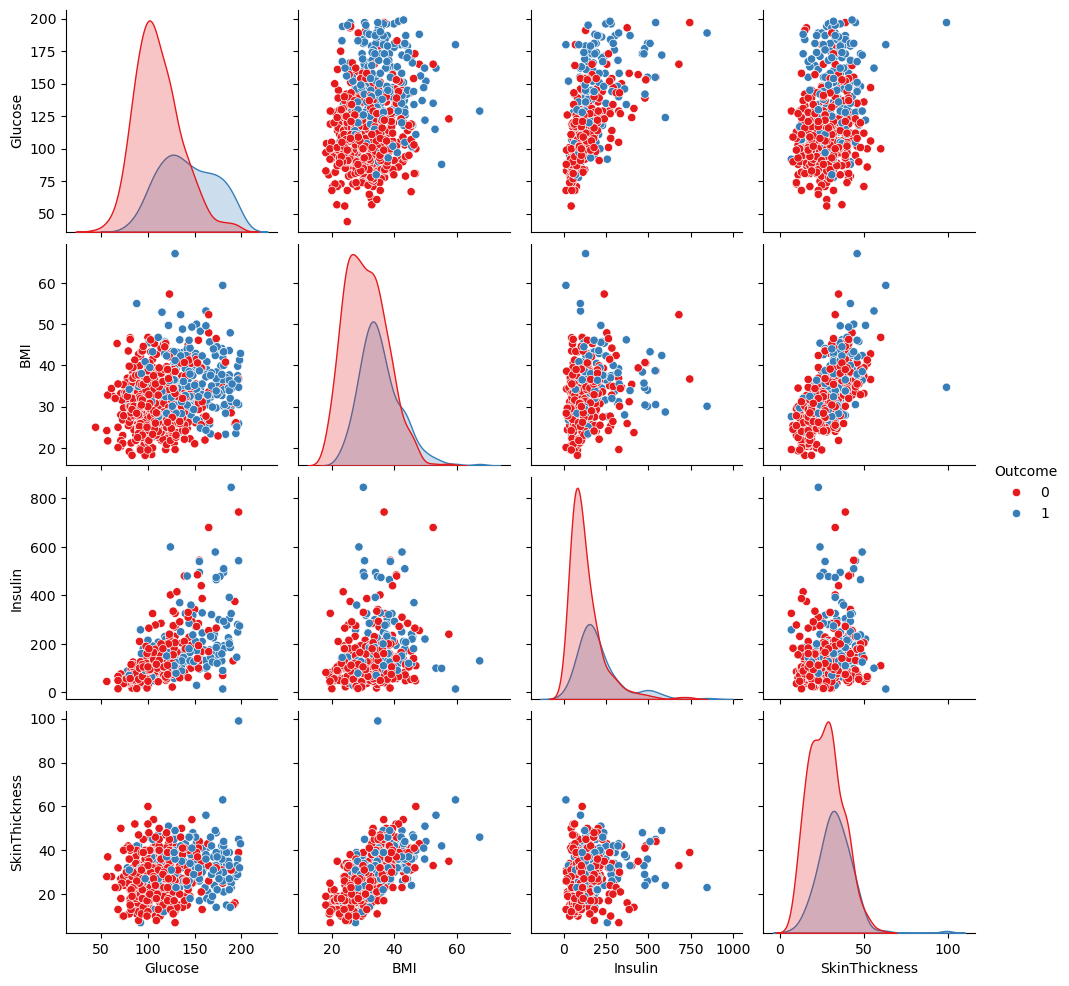

<Figure size 100x100 with 0 Axes>

In [74]:
df_cols = ["Glucose", "BMI", "Insulin", "SkinThickness", "Outcome"]

sns.pairplot(data=df[df_cols], hue="Outcome", diag_kind="kde", palette="Set1")
plt.show()

#### Интерпретация: 

**Glucose**
У людей с отсутсвием диабета график имеет нормальное распределение (имеет форму колокола)
График на пересечении с инсулином имеет положительную, практически линейную, корреляцию, есть несколько выбросов и у красных, и у синих точек, говорит о сильной связи этих двух параметров. 

**BMI** 
Можем подтвердить взаимосвязь ИМТ и толщиной кожной складки, график имеет положительную и линейную корреляцию, не зависит от наличия диабета. Есть пару выбросов - особых случаев. Корреляции с уровнем глюкозы нет. 


### Violin plot

**ГЛЮКОЗА**

**Интерпретация**
Медиана Glucose для Outcome=1 (есть диабет) выше: Это ожидаемый результат. Значение медианы показывает "типичный" уровень глюкозы, и оно выше для людей с диабетом.

"Хвосты" для Outcome=0 длиннее: Это означает, что у людей без диабета есть больше значений глюкозы, которые являются экстремальными выбросами.

Есть пики у Outcome=1 (есть диабет), говорит о том, что есть подгруппы. 

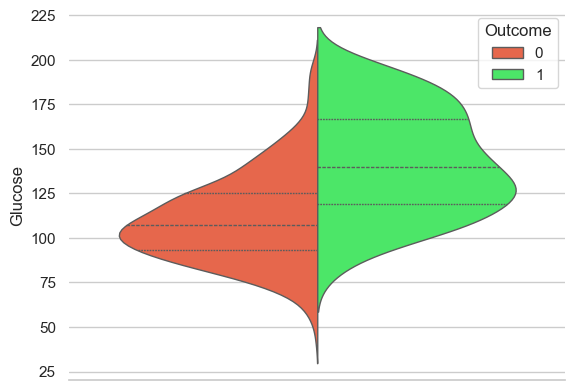

In [136]:
import seaborn as sns
sns.set_theme(style="whitegrid")


custom_palette = ["#FF5733", "#33FF57"]

# Используйте различные предопределенные цветовые палитры для отображения сгруппированных скрипичных диаграмм
sns.violinplot(data=df, x=None, y="Glucose", hue="Outcome",
               split=True, inner="quart", linewidth=1,
               palette=custom_palette)
sns.despine(left=True)
plt.show()

**ИМТ**

**Интерпретация**
Медиана Glucose для Outcome=1 (есть диабет) выше: ожидаемый результат, люди с высоким ИМТ склонны к диабету.  

"Хвосты" для Outcome=1 длиннее: Это означает, что у людей с диабетом есть больше значений ИМТ, которые являются экстремальными выбросами.

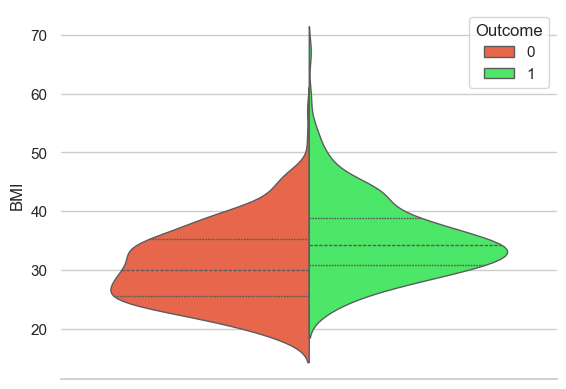

In [128]:
import seaborn as sns
sns.set_theme(style="whitegrid")


custom_palette = ["#FF5733", "#33FF57"]

# Используйте различные предопределенные цветовые палитры для отображения сгруппированных скрипичных диаграмм
sns.violinplot(data=df, x=None, y="BMI", hue="Outcome",
               split=True, inner="quart", linewidth=1,
               palette=custom_palette)
sns.despine(left=True)
plt.show()

**ИНСУЛИН**

**Интерпретация**
Медиана у Outcome=1 (есть диабет) выше, но не настолько, нежели у глюкозы и ИМТ. Также ярко выражена вторая подгруппа (второй пик), усы длинее у группы Outcome=1 (есть диабет). 


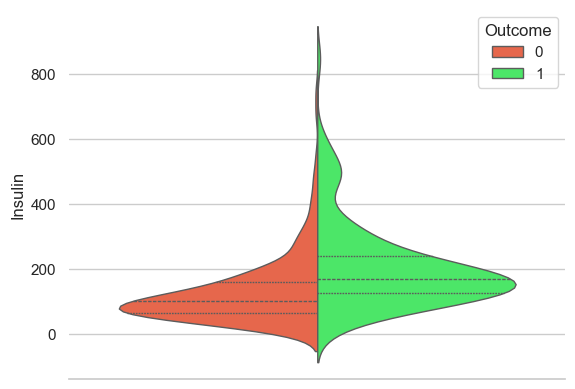

In [132]:
import seaborn as sns
sns.set_theme(style="whitegrid")


custom_palette = ["#FF5733", "#33FF57"]

# Используйте различные предопределенные цветовые палитры для отображения сгруппированных скрипичных диаграмм
sns.violinplot(data=df, x=None, y="Insulin", hue="Outcome",
               split=True, inner="quart", linewidth=1,
               palette=custom_palette)
sns.despine(left=True)
plt.show()

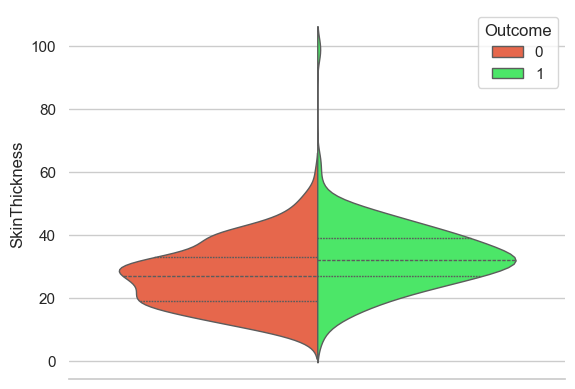

In [134]:
import seaborn as sns
sns.set_theme(style="whitegrid")

custom_palette = ["#FF5733", "#33FF57"]

# Используйте различные предопределенные цветовые палитры для отображения сгруппированных скрипичных диаграмм
sns.violinplot(data=df, x=None, y="SkinThickness", hue="Outcome",
               split=True, inner="quart", linewidth=1,
               palette=custom_palette)
sns.despine(left=True)
plt.show()

**ТОЛЩИНА КОЖНОЙ СКЛАДКИ**

**Интерпретация**
Медиана у Outcome=1 (есть диабет) выше, примерно там же, где и у ИМТ. У Outcome=1 (есть диабет) значительно длинне усы, говорит о том, что разброс данных больше, график имеет форму колокола. 
У Outcome=0 (нет диабета) несколько пиков, говорит о появлении трех подгрупп.

## Задание 6. Подготовка данных для обучения моделей

In [183]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


# Убираем нулевые значения
total_nans = df.isna().sum().sum()
print("Количество всех значений NaN:", total_nans)

# Выделение обучающих и целевых признаков
X = df.drop('Outcome', axis=1) # Выделяет все столбцы, кроме 'Outcome', в DataFrame X (обучающие признаки).
y = df['Outcome'] # Выделяет столбец 'Outcome' в Series y (целевой признак).


# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Проверка распределения целевого признака (для стратификации)
print("Распределение целевого признака в обучающей выборке:")
print(y_train.value_counts(normalize=True))
print("\nРаспределение целевого признака в тестовой выборке:")
print(y_test.value_counts(normalize=True))

# Масштабирование числовых признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nРазмер обучающей выборки X_train:", X_train.shape)
print("Размер тестовой выборки X_test:", X_test.shape)
print("Размер обучающей выборки y_train:", y_train.shape)
print("Размер тестовой выборки y_test:", y_test.shape)

Количество всех значений NaN: 652
Распределение целевого признака в обучающей выборке:
Outcome
0    0.651769
1    0.348231
Name: proportion, dtype: float64

Распределение целевого признака в тестовой выборке:
Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64

Размер обучающей выборки X_train: (537, 8)
Размер тестовой выборки X_test: (231, 8)
Размер обучающей выборки y_train: (537,)
Размер тестовой выборки y_test: (231,)


**Описание**

•  Обучающая выборка: Используется для обучения модели. Модель "учится" на этих данных, устанавливая веса своих параметров. В нашем случае, это 70% данных.
  •  Тестовая выборка: Используется для оценки качества обученной модели. Модель делает предсказания на этих данных, и мы сравниваем эти предсказания с истинными значениями, чтобы оценить, насколько хорошо модель обобщает на новые данные (невиденные во время обучения). В нашем случае, это 30% данных.

Важно, что разделение выполняется случайным образом, чтобы обеспечить репрезентативность обучающей и тестовой выборок. Параметр random_state позволяет воспроизводить результаты, то есть, при одном и том же значении random_state разделение будет одинаковым. Параметр stratify=y гарантирует, что пропорция классов (0 и 1) в обучающей и тестовой выборках будет сохранена такой же, как в исходных данных. Это предотвращает проблемы с несбалансированными данными, когда одного класса (например, диабета) значительно больше, чем другого.

После разделения данных важно убедиться, что распределение целевой переменной (Outcome) в обучающей и тестовой выборках действительно похоже. Это помогает проверить, что стратификация сработала и обе выборки репрезентативны для исходного набора данных. Вычисление доли каждого класса (value_counts(normalize=True)) позволяет увидеть это наглядно.

Масштабирование числовых признаков: Логистическая регрессия, как и многие другие алгоритмы машинного обучения, чувствительна к масштабу данных. Если признаки имеют сильно различающиеся диапазоны значений, то признаки с большими значениями будут доминировать над признаками с меньшими значениями. StandardScaler нормализует (масштабирует) данные, вычитая среднее значение и деля на стандартное отклонение. Это приводит все признаки к одному масштабу, что улучшает работу модели. Важно, что StandardScaler применяется отдельно к обучающей и тестовой выборкам. Вычисляем среднее и стандартное отклонение только на обучающей выборке и применяем эти параметры к тестовой выборке, чтобы избежать утечки информации из тестовой выборки в обучающую (что может привести к завышению оценки качества).

### Задание 7. Построение и оценка базовой модели логистической регрессии

**Accuracy** - общая точность модели. Показывает, какую долю всех образцов модель классифицировала правильно. 
Значение 78% говорит нам о том, что модель классифицирует правильно примерно 8 из 10 случаев. Данный показатель является средним, если брать другие модели. Изначально, если брать параметр random_state=42, точность модели была 74%, наилучшиий результат получился с параметром 43. Также я решила воспользоваться методом Selected и отобрать 5 самых лучших признаков, получилось поднять точность до 80%

**Precisio**  - Показатель полноты равен 75%, что означает, что среди всех предсказанных положительных случаев около 75% действительно являются положительными. То есть, в 25% случаев диагноз поставлен неверно. Этот результат показывает, что у модели все таки есть склонность к ложноположительным результатам.

**Recall** - точность положительных предсказаний. Важно при прогнозировании диабета, так как ложноположительный результат (диагноз диабета у здорового человека) может привести к ненужному лечению и стрессу. Высокий precision означает, что когда модель предсказывает диабет, она, скорее всего, права. В моей моделе точность 64% - средний показатель. 

**F1-score** - гармоническое среднее precision и recall. Учитывает баланс между точностью и полнотой. Полезно, когда важно учитывать обе метрики. 

**ROC-AUC** - площадь под кривой ROC. Показывает общую способность модели различать два класса. Значение 0.5 означает случайное предсказание, а 1.0 - идеальное предсказание. ROC-AUC менее чувствительна к несбалансированности данных, чем accuracy. 87% говорит о том, что модель хорошо различает классы (с диабетом и без)


In [301]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif


def prepare_data(csv_file):
    df = pd.read_csv(csv_file)
    
    X = df.drop('Outcome',  axis=1)
    y = df['Outcome']


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=43, stratify=y)
    
    selector = SelectKBest(score_func=f_classif, k=4) # Выбираем 5 лучших признаков
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_train.mean()) 

    X_train = X_train.astype('float64')
    X_test = X_test.astype('float64')

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_selected)
    X_test_scaled = scaler.transform(X_test_selected)

    return X_train_scaled, X_test_scaled, y_train, y_test


def train_and_evaluate_model(X_train, X_test, y_train, y_test):
    
    selector = SelectKBest(score_func=f_classif, k=4) # Выбираем 5 лучших признаков
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    model = LogisticRegression(max_iter=1000) 
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    y_prob = model.predict_proba(X_test)[:, 1]  

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print("Метрики качества модели:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    return model


csv_file = "diabetes.csv"
X_train, X_test, y_train, y_test = prepare_data(csv_file)

train_and_evaluate_model(X_train, X_test, y_train, y_test)

Метрики качества модели:
Accuracy: 0.8009
Precision: 0.7536
Recall: 0.6420
F1-score: 0.6933
ROC-AUC: 0.8660


In [301]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif


def prepare_data(csv_file):
    df = pd.read_csv(csv_file)
    
    X = df.drop('Outcome',  axis=1)
    y = df['Outcome']


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=43, stratify=y)
    
    selector = SelectKBest(score_func=f_classif, k=4) # Выбираем 5 лучших признаков
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_train.mean()) 

    X_train = X_train.astype('float64')
    X_test = X_test.astype('float64')

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_selected)
    X_test_scaled = scaler.transform(X_test_selected)

    return X_train_scaled, X_test_scaled, y_train, y_test


def train_and_evaluate_model(X_train, X_test, y_train, y_test):
    
    selector = SelectKBest(score_func=f_classif, k=4) # Выбираем 5 лучших признаков
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    model = LogisticRegression(max_iter=1000) 
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    y_prob = model.predict_proba(X_test)[:, 1]  

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print("Метрики качества модели:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    return model


csv_file = "diabetes.csv"
X_train, X_test, y_train, y_test = prepare_data(csv_file)

train_and_evaluate_model(X_train, X_test, y_train, y_test)

Метрики качества модели:
Accuracy: 0.8009
Precision: 0.7536
Recall: 0.6420
F1-score: 0.6933
ROC-AUC: 0.8660


In [343]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier


def prepare_data_1(csv_file):
    df = pd.read_csv(csv_file)
    
    X = df.drop('Outcome',  axis=1)
    y = df['Outcome']


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=43, stratify=y)

    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_train.mean()) 

    X_train = X_train.astype('float64')
    X_test = X_test.astype('float64')

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

def new_accur(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators - количество деревьев
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_rf)
    precision = precision_score(y_test, y_pred_rf)
    recall = recall_score(y_test, y_pred_rf)
    f1 = f1_score(y_test, y_pred_rf)
    #roc_auc = roc_auc_score(y_test, y_prod)
    print("Метрики качества модели:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    

csv_file = "diabetes.csv"
X_train, X_test, y_train, y_test = prepare_data(csv_file)

new_accur(X_train, X_test, y_train, y_test)

Метрики качества модели:
Accuracy: 0.8139
Precision: 0.7639
Recall: 0.6790
F1-score: 0.7190


Также решила попробовать другой метод ML: Random Forest, основанный на ансамбле деревьев решений. Метрики с данным методом в среднем на 1% выше 

## Задание 8. Использование модели

In [443]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif


def prepare_data(csv_file):
    df = pd.read_csv(csv_file)
    
    X = df.drop('Outcome',  axis=1)
    y = df['Outcome']


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=43, stratify=y)
    
    selector = SelectKBest(score_func=f_classif, k=4) # Выбираем 4 лучших признака
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_train.mean()) 

    X_train = X_train.astype('float64')
    X_test = X_test.astype('float64')

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_selected)
    X_test_scaled = scaler.transform(X_test_selected)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, selector, X.columns, X_train
def train_and_evaluate_model(X_train, X_test, y_train, y_test):
    
    model = LogisticRegression(max_iter=1000) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print("Метрики качества модели:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    return model

csv_file = "diabetes.csv"
X_train, X_test, y_train, y_test, scaler, selector, feature_names, X_train_all = prepare_data(csv_file)
model = train_and_evaluate_model(X_train, X_test, y_train, y_test)

# Выводим коэффициенты
coefficients = np.zeros(len(feature_names))
coefficients[selector.get_support(indices=True)] = model.coef_[0]
print("\nКоэффициенты логистической регрессии:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

def predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness, insulin, BMI, diabetes_pedigree_function, age, model, scaler, selector, feature_names, X_train_all):
    # 1. Создаем вектор признаков из входных значений
    features = np.array([pregnancies, glucose, blood_pressure, skin_thickness, insulin, BMI, diabetes_pedigree_function, age]).reshape(1, -1)
    
    # 2. Создадим dataframe для выборки признаков
    features_df = pd.DataFrame(features, columns = feature_names)

    # 3. Выбираем лучшие признаки
    selected_features = selector.transform(features_df)

    # 4. Масштабируем вектор признаков
    scaled_features = scaler.transform(selected_features)
    
    # 5. Делаем предсказание с помощью модели
    probability = model.predict_proba(scaled_features)[0, 1]

    return probability

# Пример использования функции
pregnancies = 3
glucose = 150
blood_pressure = 70
skin_thickness = 30
insulin = 120
BMI = 30
diabetes_pedigree_function = 0.5
age = 40

print("-"*50)
probability = predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness, insulin, BMI, diabetes_pedigree_function, age, model, scaler, selector, feature_names, X_train_all)
print(f"Вероятность наличия диабета: {probability:.4f}")

pregnancies_1 = 6
glucose_1 = 148
blood_pressure_1 = 72
skin_thickness_1 = 35
insulin_1 = 0
BMI_1 = 36
diabetes_pedigree_function_1 = 0.627
age_1 = 50

print("-"*50)
print("Данные из таблицы, пациентка у которой есть диабет")
probability = predict_diabetes(pregnancies_1, glucose_1, blood_pressure_1, skin_thickness_1, insulin_1, BMI_1, diabetes_pedigree_function_1, age_1, model, scaler, selector, feature_names, X_train_all)
print(f"Вероятность наличия диабета: {probability:.4f}")

pregnancies_2 = 1
glucose_2 = 85
blood_pressure_2 = 66
skin_thickness_2 = 29
insulin_2 = 0
BMI_2 = 26
diabetes_pedigree_function_2 = 0.35
age_2 = 31

print("-"*50)
print("Данные из таблицы, пациентка у которой нет диабета")
probability = predict_diabetes(pregnancies_2, glucose_2, blood_pressure_2, skin_thickness_2, insulin_2, BMI_2, diabetes_pedigree_function_2, age_2, model, scaler, selector, feature_names, X_train_all)
print(f"Вероятность наличия диабета: {probability:.4f}")



Метрики качества модели:
Accuracy: 0.8009
Precision: 0.7536
Recall: 0.6420
F1-score: 0.6933
ROC-AUC: 0.8660

Коэффициенты логистической регрессии:
Pregnancies: 0.4115
Glucose: 0.9251
BloodPressure: 0.0000
SkinThickness: 0.0000
Insulin: 0.0000
BMI: 0.6263
DiabetesPedigreeFunction: 0.3545
Age: 0.0000
--------------------------------------------------
Вероятность наличия диабета: 0.4576
--------------------------------------------------
Данные из таблицы, пациентка у которой есть диабет
Вероятность наличия диабета: 0.6784
--------------------------------------------------
Данные из таблицы, пациентка у которой нет диабета
Вероятность наличия диабета: 0.0578


**Коэффициенты логистической регресии** - это числовые значения, которые определяют влияние каждого признака на предсказываемую вероятность. Каждый признак (например, уровень глюкозы, возраст, и т.д.) имеет свой коэффициент. 

**Положительный коэффициент** (bi > 0): Увеличение значения признака xi увеличивает значение *логита*, а значит и *вероятность* принадлежности к классу 1. То есть, чем больше значение этого признака, тем выше вероятность, что событие произойдет (например, наличие диабета).
**Отрицательный коэффициент** (bi < 0): Увеличение значения признака xi уменьшает значение *логита* и, следовательно, *вероятность* принадлежности к классу 1. То есть, чем больше значение этого признака, тем ниже вероятность, что событие произойдет.
**Абсолютная величина**
    -   Чем больше абсолютное значение коэффициента bi, тем большее влияние оказывает соответствующий признак на предсказываемую вероятность. Признак с большим абсолютным значением коэффициента сильнее влияет на предсказание.
    -  Коэффициент, близкий к 0, означает, что признак почти не влияет на предсказание.

В данном случае, я исправляла модель, которая изначально показывала плохие результаты по метрикам, добавила метод выборки признаков и поставила random_state=43, после чего моя модель повысила точность. Однако, меня удивили результаты коэффициентов. По итогу, самыми значими признакими стали глюкоза, беременность, ИМТ и гентическая предрасположенность. 


## Бонусное задание 9. Подбор гиперпараметров с использованием Grid Search

In [408]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_classification


def prepare_data(csv_file):
    df = pd.read_csv(csv_file)
    
    X = df.drop('Outcome',  axis=1)
    y = df['Outcome']


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=43, stratify=y)
    
    selector = SelectKBest(score_func=f_classif, k=4) # Выбираем 5 лучших признаков
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_train.mean()) 

    X_train = X_train.astype('float64')
    X_test = X_test.astype('float64')

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_selected)
    X_test_scaled = scaler.transform(X_test_selected)

    return X_train_scaled, X_test_scaled, y_train, y_test


def train_and_evaluate_model(X_train, X_test, y_train, y_test):

    X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Различные значения регуляризации
    'penalty': ['l1', 'l2'],             # Тип регуляризации
    'solver': ['liblinear'],              # Решатель для l1/l2 регуляризации
    'random_state': [42, 43, 147, 0]
    }

    grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print("Лучшие параметры:", grid_search.best_params_)
    print("Лучший ROC-AUC на кросс-валидации:", grid_search.best_score_)

    best_model = grid_search.best_estimator_
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Вероятности для ROC-AUC
    y_pred = best_model.predict(X_test) # Предсказания классов
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("-"*50)

    print("Метрики качества модели:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    return model


csv_file = "diabetes.csv"
X_train, X_test, y_train, y_test = prepare_data(csv_file)

train_and_evaluate_model(X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Лучшие параметры: {'C': 1, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}
Лучший ROC-AUC на кросс-валидации: 0.9210069943470346
--------------------------------------------------
Метрики качества модели:
Accuracy: 0.8400
Precision: 0.8000
Recall: 0.8980
F1-score: 0.8462
ROC-AUC: 0.8411


LogisticRegression(max_iter=1000)

**Выводы о качестве работы новой модели и об эффективности метода Grid Search**

Лучшими параметрами оказались: 
C (параметр регуляризации) - этот параметр управляет силой регуляризации в модели. Регуляризация — это метод, который помогает предотвратить переобучение модели, добавляя штраф к сложности модели.

С=1 Уменьшает силу регуляризации, то есть модель становится более сложной и более склонной к переобучению.

Penalty (тип регуляризации) -  этот параметр определяет, какой тип регуляризации будет использоваться.
Варианты:
  •  l1 (L1-регуляризация, Lasso): Добавляет штраф, пропорциональный абсолютным значениям весов модели. L1-регуляризация может приводить к разреженным моделям, где некоторые веса становятся равными нулю, что по сути отключает соответствующие признаки (выбор признаков).
  •  l2 (L2-регуляризация, Ridge): Добавляет штраф, пропорциональный квадратам весов модели. L2-регуляризация не обнуляет веса, а уменьшает их значения.
  
L1 отключил некоторые признаки, в целмом, в первой базовой модели я также оставила лучшие признаки

Solver (алгоритм оптимизации) - этот параметр определяет алгоритм, который используется для решения оптимизационной задачи при обучении логистической регрессии.

liblinear: Хорошо работает с небольшими наборами данных, подходит для L1 и L2 регуляризации. Это один из самых популярных решателей для задач бинарной классификации.

Метрики качества новой модели:
Accuracy: 0.8400
Precision: 0.8000
Recall: 0.8980
F1-score: 0.8462
ROC-AUC: 0.9037

Метрики качества базовой модели:
Accuracy: 0.8009
Precision: 0.7536
Recall: 0.6420
F1-score: 0.6933
ROC-AUC: 0.8660

Новая модель показывает лучшие результаты по метриками точности и полноты, однако ROC_AUC и F1 упали на 4% и 15% процентов соответственно. Параметр Recall также упал, это говорит о том, что модель стала чаще ошибаться и ставить ложный диагноз. 